## Parser for .res files

In [71]:
import json
added_lines = []

with open("dfvs.jar.res", 'r') as f:
    lines = f.readlines()
    data = {}
    for line in lines:

        temp = {}

        if 'correct' in line:
            split_arr = line.split('\t')
            time = split_arr[1].strip().split(' ')[0]
            temp['t'] = float(time[time.index(':')+1:]) + 60*float(time[:time.index(':')])
            temp['k'] = int(split_arr[2][1:split_arr[2].index(',')])
        else:
            continue
            
        if 'complex' in line:
            temp['c'] = 'complex'
        elif 'synthetic' in line:
            temp['c'] = 'synthetic'
        else:
            temp['c'] = 'unknown'

        name = line[line.index(temp['c'] + '/')+len(temp['c'])+1: line.index(' ')]

        if name in added_lines:
            continue
        added_lines.append(name)

        temp['n'] = int(name[name.index('-n_')+3: name.index('-m_')])
        
        if '-p_' not in name:
            if '.mtx' in name:
                temp['m'] = int(name[name.index('-m_')+3: name.index('.mtx')])
            else:
                    temp['m'] = int(name[name.index('-m_')+3:])
        else:
            if '-k_'in name:
                temp['m'] = int(name[name.index('-m_')+3: name.index('-k_')])
            else:
                temp['m'] = int(name[name.index('-m_')+3: name.index('-p_')])
    
        data[name] = temp

with open('result.json', 'w') as f:
    json.dump(data, f)

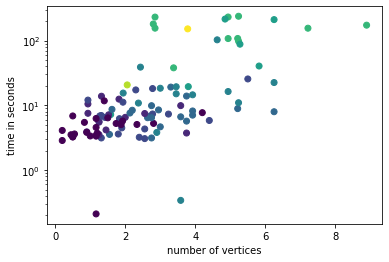

In [27]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from math import log

with open('result.json', 'r') as f:
    data = json.loads(f.read())

df = pd.DataFrame(data).transpose()
df.columns = ['t', 'k', 'class', 'n', 'm']

plt.scatter((df['m']/df['n']), df['t'], c=df['k'])
plt.yscale('log')
plt.xlabel('number of vertices')
plt.ylabel('time in seconds');

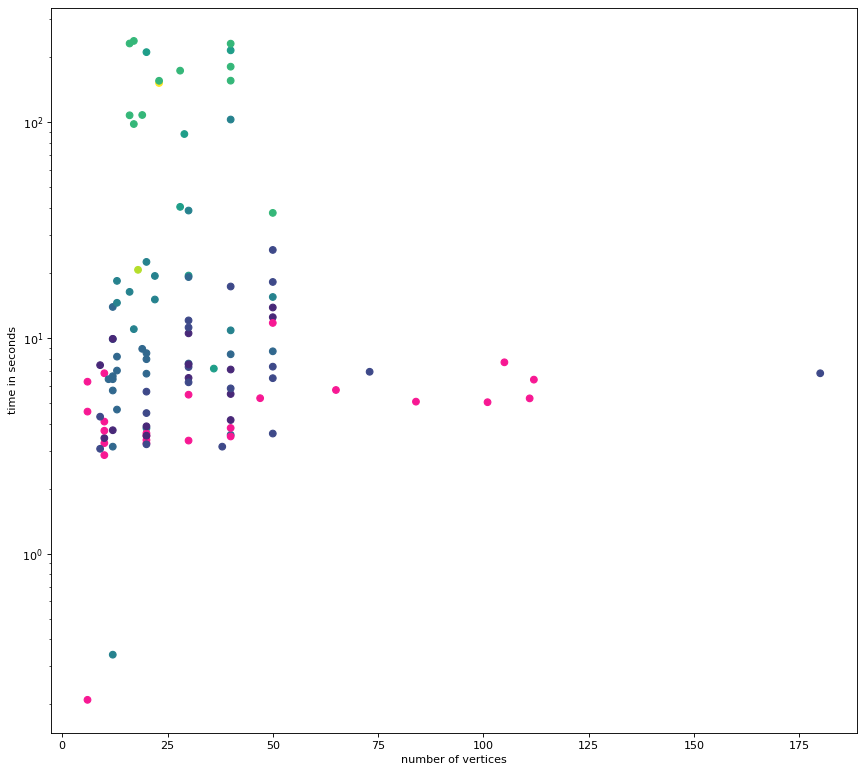

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

figure(figsize=(13, 12), dpi=80)

viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:1, :] = pink
newcmp = ListedColormap(newcolors)

# df = df[df['k']>0]
plt.scatter(df['n'], df['t'], c=df['k'], cmap=newcmp)
plt.yscale('log')
plt.xlabel('number of vertices')
plt.ylabel('time in seconds');